# Exploratory Data Analysis (EDA) – Descriptive Analysis

## Weekly Purchase Trends Analysis


### On which day of the week do customers make the most purchases?

### 1. Overview
This analysis investigates weekly purchasing behavior to identify which day of the week generates the highest customer spending. By analyzing transaction data across the seven-day week, we gain valuable insights into customer habits and uncover trends that can inform sales, staffing, and marketing strategies. The results are presented visually to clearly highlight the strongest and weakest days for business activity.

### 2. Goal

- To explore and visualize customer purchasing trends by day of the week.
- To identify which day(s) customers make the highest volume of purchases.
- To identify low-performing days that may benefit from promotional strategies.
- To quantify the total sales generated on each day to uncover patterns or spikes.
- To provide data-backed insights that support demand forecasting, staffing, and promotional planning

###  3. Business Challenge

- Lack of clarity on which days drive the highest or lowest sales, leading to ineffective resource allocation.
- Difficulty in aligning marketing campaigns or promotional offers with peak customer activity.
- Underutilization of workforce scheduling and inventory management due to limited insight into weekly demand trends.
- Missed opportunities to capitalize on high-traffic days to increase revenue and customer engagement.

###  4. Methodology

- Aggregate Sales Data: Group total sales by day of the week to understand daily revenue patterns.
- Visualize the Trends: Use a clean, formatted bar chart to highlight purchase trends.
- Reorder Days: Arrange days in chronological order (Mon–Sun) for intuitive interpretation.
- Apply Formatting: Enhance readability through label formatting, gridlines, and static axis ticks.
- Interpret Results: Identify peak sales day(s) and draw conclusions to inform business strategy.

### Import necessary libraries

In [5]:
import pandas as pd
import os
import glob

### Combine the sales data from all months into a single consolidated CSV file

In [7]:
folder_path = r"C:\Monthly_Sales"

# Retrieve all CSV files from the folder using glob
all_files = glob.glob(os.path.join(folder_path, "*.csv"))

# All CSV files combined as one DataFrame 
all_data = pd.concat([pd.read_csv(file) for file in all_files], ignore_index=True)

# Merged DataFrame saved into a new CSV
output_file = os.path.join(folder_path, "all_data.csv")
all_data.to_csv(output_file, index=False)

print("All files integrated into:", output_file)

All files integrated into: C:\Monthly_Sales\all_data.csv


### Load the updated DataFrame

In [9]:
# Skip Blank Rows if present in the dataset

df = pd.read_csv(r'C:\Monthly_Sales\all_data.csv', skip_blank_lines=True)
df.head()

,Order ID,Product Name,Units Purchased,Unit Price,Order Date,Delivery Address
0,175667,iPhone,1,700.0,04/24/24 19:12,"135 Meadow St, Boston, MA 02215"
1,175668,AA Batteries (4-pack),1,5.84,04/20/24 13:45,"592 4th St, San Francisco, CA 94016"
2,175669,AA Batteries (4-pack),1,5.84,04/28/24 09:17,"632 Park St, Dallas, TX 75001"
3,175670,AA Batteries (4-pack),2,5.84,04/23/24 14:06,"131 Pine St, San Francisco, CA 94016"
4,175671,Samsung Odyssey Monitor,1,409.99,04/23/24 12:13,"836 Forest St, Boston, MA 02215"


In [10]:
df.shape

(9834269, 6)

## Data Cleaning Process

Thoroughly clean and standardize the data to eliminate errors, ensure consistency, and build a solid foundation for meaningful insights.

### Find and remove rows with NaN values

In [13]:
df.isna().sum()

Order ID            25536
Product Name        25536
Units Purchased     25538
Unit Price          25538
Order Date          25539
Delivery Address    25540
dtype: int64

In [14]:
# If Nan value is present in Order ID and Unit Purchased, it will be impossible to manipulate the data.
# Therefore, drop Nan values in Order ID and Units Purchased.

df.dropna(subset=['Order ID', 'Units Purchased'], inplace=True)

In [15]:
# Check if Nan value is present

df.isna().sum()

Order ID            0
Product Name        0
Units Purchased     0
Unit Price          0
Order Date          1
Delivery Address    2
dtype: int64

In [16]:
# Further check if any NaN values or blank rows are present

blank_rows_na = df[df.isnull().any(axis=1)]
blank_rows_na

,Order ID,Product Name,Units Purchased,Unit Price,Order Date,Delivery Address
2195228,Charging Cable,1,14.95,05/24/24 07:04,"852 Hickory St, San Francisco, CA 94016",NaN
3001506,150766,iPhone,1,7,NaN,NaN


#### Find and remove rows with duplicate values

In [18]:
# Find duplicate values

df.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
9834264     True
9834265     True
9834266     True
9834267     True
9834268     True
Length: 9808731, dtype: bool

In [19]:
# Remove duplicated values

df.drop_duplicates(inplace = True)

In [20]:
# Check again for duplicated values

df.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
172530     False
2195228    False
3001506    False
6370083    False
6403571    False
Length: 171546, dtype: bool

### Verify and fix incorrect data types in the dataset

In [22]:
# check for data types

df.dtypes

Order ID            object
Product Name        object
Units Purchased     object
Unit Price          object
Order Date          object
Delivery Address    object
dtype: object

#### Fix incorrect data types

In [24]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%y %H:%M', errors='coerce')

df['Units Purchased'] = pd. to_numeric(df['Units Purchased'], errors='coerce')

df['Unit Price'] = pd. to_numeric(df['Unit Price'], errors='coerce')

In [25]:
# Verify the presence of NaN values remaining in the columns as a result of using errors='coerce' during data conversion.

df.isna().sum()

Order ID            0
Product Name        0
Units Purchased     1
Unit Price          2
Order Date          3
Delivery Address    2
dtype: int64

In [26]:
df = df.dropna()

### Change the data type to optimize memory usage (Optional)

In [28]:
df['Order ID'] = pd.to_numeric(df['Order ID'], downcast='integer') 
df['Product Name'] = df['Product Name'].astype('category')  
df['Units Purchased'] = df['Units Purchased']. astype('int8') 
df['Unit Price'] = pd.to_numeric(df['Unit Price'], downcast='float')   
df['Delivery Address'] = df['Delivery Address'].astype('category') 

## Expand the dataset with supplementary columns

### Add month column

In [31]:
df['Month'] = df['Order Date'].dt.month
df

,Order ID,Product Name,Units Purchased,Unit Price,Order Date,Delivery Address,Month
0,175667,iPhone,1,700.00000,2024-04-24 19:12:00,"135 Meadow St, Boston, MA 02215",4
1,175668,AA Batteries (4-pack),1,5.84000,2024-04-20 13:45:00,"592 4th St, San Francisco, CA 94016",4
2,175669,AA Batteries (4-pack),1,5.84000,2024-04-28 09:17:00,"632 Park St, Dallas, TX 75001",4
3,175670,AA Batteries (4-pack),2,5.84000,2024-04-23 14:06:00,"131 Pine St, San Francisco, CA 94016",4
4,175671,Samsung Odyssey Monitor,1,409.98999,2024-04-23 12:13:00,"836 Forest St, Boston, MA 02215",4
...,...,...,...,...,...,...,...
172528,248378,Google Phone,1,600.00000,2024-09-02 08:53:00,"668 Wilson St, Boston, MA 02215",9
172529,248379,Alienware Monitor,1,400.98999,2024-09-04 22:58:00,"466 2nd St, Boston, MA 02215",9
172530,248380,AAA Batteries (4-pack),1,4.99000,2024-09-04 13:09:00,"133 Walnut St, Seattle, WA 98101",9
6370083,252436,Apple Airpods Headphones,1,150.00000,2024-10-14 16:44:00,"740 Dogwood St, Boston, \rA 02215",10


In [32]:
df['Month Name'] = df['Order Date'].dt.strftime('%B')
df

,Order ID,Product Name,Units Purchased,Unit Price,Order Date,Delivery Address,Month,Month Name
0,175667,iPhone,1,700.00000,2024-04-24 19:12:00,"135 Meadow St, Boston, MA 02215",4,April
1,175668,AA Batteries (4-pack),1,5.84000,2024-04-20 13:45:00,"592 4th St, San Francisco, CA 94016",4,April
2,175669,AA Batteries (4-pack),1,5.84000,2024-04-28 09:17:00,"632 Park St, Dallas, TX 75001",4,April
3,175670,AA Batteries (4-pack),2,5.84000,2024-04-23 14:06:00,"131 Pine St, San Francisco, CA 94016",4,April
4,175671,Samsung Odyssey Monitor,1,409.98999,2024-04-23 12:13:00,"836 Forest St, Boston, MA 02215",4,April
...,...,...,...,...,...,...,...,...
172528,248378,Google Phone,1,600.00000,2024-09-02 08:53:00,"668 Wilson St, Boston, MA 02215",9,September
172529,248379,Alienware Monitor,1,400.98999,2024-09-04 22:58:00,"466 2nd St, Boston, MA 02215",9,September
172530,248380,AAA Batteries (4-pack),1,4.99000,2024-09-04 13:09:00,"133 Walnut St, Seattle, WA 98101",9,September
6370083,252436,Apple Airpods Headphones,1,150.00000,2024-10-14 16:44:00,"740 Dogwood St, Boston, \rA 02215",10,October


### Add week day column

In [34]:
df['Day of Week'] = df['Order Date'].dt.strftime('%a')
df

,Order ID,Product Name,Units Purchased,Unit Price,Order Date,Delivery Address,Month,Month Name,Day of Week
0,175667,iPhone,1,700.00000,2024-04-24 19:12:00,"135 Meadow St, Boston, MA 02215",4,April,Wed
1,175668,AA Batteries (4-pack),1,5.84000,2024-04-20 13:45:00,"592 4th St, San Francisco, CA 94016",4,April,Sat
2,175669,AA Batteries (4-pack),1,5.84000,2024-04-28 09:17:00,"632 Park St, Dallas, TX 75001",4,April,Sun
3,175670,AA Batteries (4-pack),2,5.84000,2024-04-23 14:06:00,"131 Pine St, San Francisco, CA 94016",4,April,Tue
4,175671,Samsung Odyssey Monitor,1,409.98999,2024-04-23 12:13:00,"836 Forest St, Boston, MA 02215",4,April,Tue
...,...,...,...,...,...,...,...,...,...
172528,248378,Google Phone,1,600.00000,2024-09-02 08:53:00,"668 Wilson St, Boston, MA 02215",9,September,Mon
172529,248379,Alienware Monitor,1,400.98999,2024-09-04 22:58:00,"466 2nd St, Boston, MA 02215",9,September,Wed
172530,248380,AAA Batteries (4-pack),1,4.99000,2024-09-04 13:09:00,"133 Walnut St, Seattle, WA 98101",9,September,Wed
6370083,252436,Apple Airpods Headphones,1,150.00000,2024-10-14 16:44:00,"740 Dogwood St, Boston, \rA 02215",10,October,Mon


### Add hour column

In [36]:
df['Hour'] = df['Order Date'].dt.hour
df

,Order ID,Product Name,Units Purchased,Unit Price,Order Date,Delivery Address,Month,Month Name,Day of Week,Hour
0,175667,iPhone,1,700.00000,2024-04-24 19:12:00,"135 Meadow St, Boston, MA 02215",4,April,Wed,19
1,175668,AA Batteries (4-pack),1,5.84000,2024-04-20 13:45:00,"592 4th St, San Francisco, CA 94016",4,April,Sat,13
2,175669,AA Batteries (4-pack),1,5.84000,2024-04-28 09:17:00,"632 Park St, Dallas, TX 75001",4,April,Sun,9
3,175670,AA Batteries (4-pack),2,5.84000,2024-04-23 14:06:00,"131 Pine St, San Francisco, CA 94016",4,April,Tue,14
4,175671,Samsung Odyssey Monitor,1,409.98999,2024-04-23 12:13:00,"836 Forest St, Boston, MA 02215",4,April,Tue,12
...,...,...,...,...,...,...,...,...,...,...
172528,248378,Google Phone,1,600.00000,2024-09-02 08:53:00,"668 Wilson St, Boston, MA 02215",9,September,Mon,8
172529,248379,Alienware Monitor,1,400.98999,2024-09-04 22:58:00,"466 2nd St, Boston, MA 02215",9,September,Wed,22
172530,248380,AAA Batteries (4-pack),1,4.99000,2024-09-04 13:09:00,"133 Walnut St, Seattle, WA 98101",9,September,Wed,13
6370083,252436,Apple Airpods Headphones,1,150.00000,2024-10-14 16:44:00,"740 Dogwood St, Boston, \rA 02215",10,October,Mon,16


### Add city column

In [38]:
def city(address):
    return address.split(",")[1].strip(" ")

def state_abbrev(address):
    return address.split(",")[2].split(" ")[1]

df['City'] = df['Delivery Address'].apply(lambda x: f"{city(x)}  ({state_abbrev(x)})")
df.head()

,Order ID,Product Name,Units Purchased,Unit Price,Order Date,Delivery Address,Month,Month Name,Day of Week,Hour,City
0,175667,iPhone,1,700.00000,2024-04-24 19:12:00,"135 Meadow St, Boston, MA 02215",4,April,Wed,19,Boston (MA)
1,175668,AA Batteries (4-pack),1,5.84000,2024-04-20 13:45:00,"592 4th St, San Francisco, CA 94016",4,April,Sat,13,San Francisco (CA)
2,175669,AA Batteries (4-pack),1,5.84000,2024-04-28 09:17:00,"632 Park St, Dallas, TX 75001",4,April,Sun,9,Dallas (TX)
3,175670,AA Batteries (4-pack),2,5.84000,2024-04-23 14:06:00,"131 Pine St, San Francisco, CA 94016",4,April,Tue,14,San Francisco (CA)
4,175671,Samsung Odyssey Monitor,1,409.98999,2024-04-23 12:13:00,"836 Forest St, Boston, MA 02215",4,April,Tue,12,Boston (MA)


### Organize Data by Order Date Chronologically and Reindex

In [40]:
df = df.sort_values(by = 'Order Date')
df

,Order ID,Product Name,Units Purchased,Unit Price,Order Date,Delivery Address,Month,Month Name,Day of Week,Hour,City
78282,160155,Alienware Monitor,1,400.989990,2024-01-01 05:04:00,"765 Ridge St, Portland, OR 97035",1,January,Mon,5,Portland (OR)
68761,151041,AAA Batteries (4-pack),1,4.990000,2024-01-01 05:04:00,"964 Lakeview St, Atlanta, GA 30301",1,January,Mon,5,Atlanta (GA)
64303,146765,AAA Batteries (4-pack),1,4.990000,2024-01-01 05:20:00,"546 10th St, San Francisco, CA 94016",1,January,Mon,5,San Francisco (CA)
63092,145617,Amana Washing Machine,1,600.000000,2024-01-01 05:24:00,"961 Meadow St, Portland, OR 97035",1,January,Mon,5,Portland (OR)
74502,156535,iPhone,1,700.000000,2024-01-01 05:45:00,"451 Elm St, Los Angeles, CA 90001",1,January,Mon,5,Los Angeles (CA)
...,...,...,...,...,...,...,...,...,...,...,...
44457,297748,iPhone,1,700.000000,2025-01-01 02:37:00,"258 Forest St, Los Angeles, CA 90001",1,January,Wed,2,Los Angeles (CA)
30663,284606,Bose SoundSport Headphones,1,99.989998,2025-01-01 02:50:00,"211 Johnson St, Boston, MA 02215",1,January,Wed,2,Boston (MA)
49246,302330,AA Batteries (4-pack),1,5.840000,2025-01-01 03:03:00,"665 6th St, San Francisco, CA 94016",1,January,Wed,3,San Francisco (CA)
30770,284711,AA Batteries (4-pack),1,5.840000,2025-01-01 03:19:00,"250 8th St, San Francisco, CA 94016",1,January,Wed,3,San Francisco (CA)


In [41]:
df = df.reset_index(drop=True)
df

,Order ID,Product Name,Units Purchased,Unit Price,Order Date,Delivery Address,Month,Month Name,Day of Week,Hour,City
0,160155,Alienware Monitor,1,400.989990,2024-01-01 05:04:00,"765 Ridge St, Portland, OR 97035",1,January,Mon,5,Portland (OR)
1,151041,AAA Batteries (4-pack),1,4.990000,2024-01-01 05:04:00,"964 Lakeview St, Atlanta, GA 30301",1,January,Mon,5,Atlanta (GA)
2,146765,AAA Batteries (4-pack),1,4.990000,2024-01-01 05:20:00,"546 10th St, San Francisco, CA 94016",1,January,Mon,5,San Francisco (CA)
3,145617,Amana Washing Machine,1,600.000000,2024-01-01 05:24:00,"961 Meadow St, Portland, OR 97035",1,January,Mon,5,Portland (OR)
4,156535,iPhone,1,700.000000,2024-01-01 05:45:00,"451 Elm St, Los Angeles, CA 90001",1,January,Mon,5,Los Angeles (CA)
...,...,...,...,...,...,...,...,...,...,...,...
171538,297748,iPhone,1,700.000000,2025-01-01 02:37:00,"258 Forest St, Los Angeles, CA 90001",1,January,Wed,2,Los Angeles (CA)
171539,284606,Bose SoundSport Headphones,1,99.989998,2025-01-01 02:50:00,"211 Johnson St, Boston, MA 02215",1,January,Wed,2,Boston (MA)
171540,302330,AA Batteries (4-pack),1,5.840000,2025-01-01 03:03:00,"665 6th St, San Francisco, CA 94016",1,January,Wed,3,San Francisco (CA)
171541,284711,AA Batteries (4-pack),1,5.840000,2025-01-01 03:19:00,"250 8th St, San Francisco, CA 94016",1,January,Wed,3,San Francisco (CA)


#### Add Total Sales column

In [43]:
df['Total Sales'] = df['Units Purchased'] * df['Unit Price']
df.head()

,Order ID,Product Name,Units Purchased,Unit Price,Order Date,Delivery Address,Month,Month Name,Day of Week,Hour,City,Total Sales
0,160155,Alienware Monitor,1,400.98999,2024-01-01 05:04:00,"765 Ridge St, Portland, OR 97035",1,January,Mon,5,Portland (OR),400.98999
1,151041,AAA Batteries (4-pack),1,4.99000,2024-01-01 05:04:00,"964 Lakeview St, Atlanta, GA 30301",1,January,Mon,5,Atlanta (GA),4.99000
2,146765,AAA Batteries (4-pack),1,4.99000,2024-01-01 05:20:00,"546 10th St, San Francisco, CA 94016",1,January,Mon,5,San Francisco (CA),4.99000
3,145617,Amana Washing Machine,1,600.00000,2024-01-01 05:24:00,"961 Meadow St, Portland, OR 97035",1,January,Mon,5,Portland (OR),600.00000
4,156535,iPhone,1,700.00000,2024-01-01 05:45:00,"451 Elm St, Los Angeles, CA 90001",1,January,Mon,5,Los Angeles (CA),700.00000


#### Format Unit Price and Total Sales to 2 decimal places

In [45]:
df['Unit Price'] = df['Unit Price'].apply(lambda x: "%.2f" % x)

In [46]:
df['Total Sales'] = df['Total Sales'].apply(lambda x: "%.2f" % x)
df.head()

,Order ID,Product Name,Units Purchased,Unit Price,Order Date,Delivery Address,Month,Month Name,Day of Week,Hour,City,Total Sales
0,160155,Alienware Monitor,1,400.99,2024-01-01 05:04:00,"765 Ridge St, Portland, OR 97035",1,January,Mon,5,Portland (OR),400.99
1,151041,AAA Batteries (4-pack),1,4.99,2024-01-01 05:04:00,"964 Lakeview St, Atlanta, GA 30301",1,January,Mon,5,Atlanta (GA),4.99
2,146765,AAA Batteries (4-pack),1,4.99,2024-01-01 05:20:00,"546 10th St, San Francisco, CA 94016",1,January,Mon,5,San Francisco (CA),4.99
3,145617,Amana Washing Machine,1,600.00,2024-01-01 05:24:00,"961 Meadow St, Portland, OR 97035",1,January,Mon,5,Portland (OR),600.00
4,156535,iPhone,1,700.00,2024-01-01 05:45:00,"451 Elm St, Los Angeles, CA 90001",1,January,Mon,5,Los Angeles (CA),700.00


#### Format Unit Price and Total Sales to numeric

In [48]:
df['Unit Price'] = pd.to_numeric(df['Unit Price'])
df['Total Sales'] = pd.to_numeric(df['Total Sales'])

## Plot Daily Sales


Daily Sales:
Mon: $5,680,848.22
Tue: $5,752,431.54
Wed: $5,512,430.03
Thu: $5,409,331.67
Fri: $5,699,756.06
Sat: $5,615,146.40
Sun: $5,659,661.11


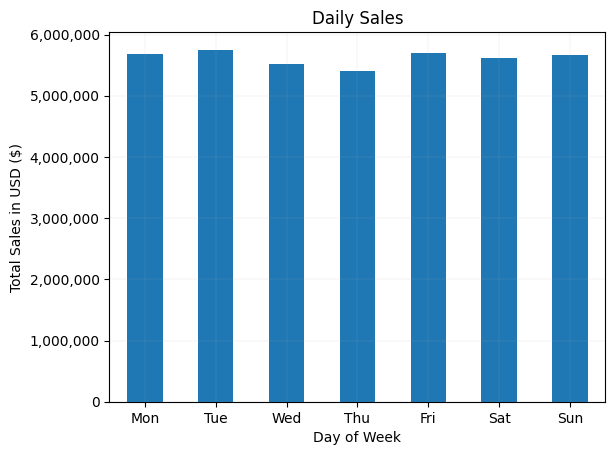

In [88]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
 
daily_sales = df.groupby('Day of Week', observed=False)['Total Sales'].sum().sort_values(ascending=False)
daily_sales

# Reorder the days
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
daily_sales = daily_sales.reindex(day_order)

# Print the values
print("\nDaily Sales:")
for day, value in daily_sales.items():
    print(f"{day}: ${value:,.2f}")

# Plot
ax = daily_sales.plot(kind='bar', title="Daily Sales")

ax.set_xlabel('Day of Week')
ax.set_ylabel('Total Sales in USD ($)')

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.xticks(rotation=0)
plt.grid(linewidth=0.1)

plt.show()

##  Key Insights

1. Tuesday is the peak day for customer purchases, bringing in the highest total sales of $5.75M.

2. Friday and Sunday closely follow as strong performers, with sales of $5.70M and $5.66M, respectively.

3. Thursday records the lowest sales volume of the week at $5.41M, suggesting it’s the least active day for purchases.

4. Overall, weekday performance is fairly balanced, with a slight edge on early and late-week days (Tue & Fri).

5. Weekends (Sat & Sun) remain strong, especially Sunday with $5.66M, which may reflect increased leisure-time shopping behavior


## Strategic Recommendations

1. Leverage Tuesday as a peak opportunity day: Launch new products, promotions, or campaigns on Tuesdays to capitalize on high customer engagement.

2. Boost Thursday performance: Introduce limited-time deals or loyalty incentives to draw traffic and increase conversions on this underperforming day.

3. Optimize operations on high-volume days: Ensure sufficient staffing, stock availability, and support coverage on Tuesday, Friday, and Sunday.

4. Consider a midweek marketing strategy: Use Wednesday and Thursday to engage inactive customers with personalized offers to smooth weekly revenue peaks.

5. Data-Driven Scheduling: Use this trend insight to inform marketing schedules, delivery logistics, and customer support planning.
